In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

Package                   Version
------------------------- -----------
absl-py                   0.11.0
aiohttp                   3.7.4.post0
aliyun-python-sdk-core    2.13.5
aliyun-python-sdk-core-v3 2.13.3
aliyun-python-sdk-kms     2.7.1
anyio                     2.2.0
argon2-cffi               20.1.0
asn1crypto                0.23.0
astor                     0.8.0
astunparse                1.6.3
async-generator           1.10
async-timeout             3.0.1
attrs                     20.3.0
autobahn                  21.2.1
backcall                  0.2.0
bleach                    3.2.1
cachetools                4.2.1
certifi                   2020.12.5
cffi                      1.14.4
chardet                   4.0.0
cloudpickle               1.6.0
conda                     4.9.2
conda-package-handling    1.3.11
contextvars               2.4
crcmod                    1.7
cryptography              3.4.7
cycler                    0.10.0
Cython                    0.29.21
dataclasses    

In [ ]:
#!git clone https://github.com/basaraking1221/Boston_house_price.git

In [ ]:
#!git clone https://github.com/w1449550206/Boston-house-price-forecast.git

In [ ]:
!python --version

Python 2.7.5


In [ ]:
#检查是否搭载显卡
#!nvidia-smi

In [ ]:
# sns.histplot(train_data[col[index]],ax = ax[i][j])
# AttributeError: module 'seaborn' has no attribute 'histplot'
# displot() has been introduced in Seaborn v0.11.0

!pip list --outdated #检查哪些包需要更新
!pip install --upgrade seaborn    #要升级的包名
# pip uninstall 要卸载的包名
#!pip show --files seaborn #安装包名

Package                   Version     Latest   Type
------------------------- ----------- -------- -----
absl-py                   0.11.0      0.12.0   wheel
aliyun-python-sdk-core    2.13.5      2.13.35  sdist
aliyun-python-sdk-core-v3 2.13.3      2.13.32  sdist
aliyun-python-sdk-kms     2.7.1       2.14.0   wheel
anyio                     2.2.0       3.0.1    wheel
asn1crypto                0.23.0      1.4.0    wheel
astor                     0.8.0       0.8.1    wheel
attrs                     20.3.0      21.2.0   wheel
bleach                    3.2.1       3.3.0    wheel
cachetools                4.2.1       4.2.2    wheel
cffi                      1.14.4      1.14.5   wheel
Cython                    0.29.21     0.29.23  wheel
decorator                 4.4.2       5.0.7    wheel
defusedxml                0.6.0       0.7.1    wheel
dlib                      19.21.1     19.22.0  sdist
faiss                     1.4.0       1.5.3    wheel
flatbuffers               1.12        2.0      

In [ ]:
import seaborn as sns
##用于可视化图表
import matplotlib.pyplot as plt
##用于做科学计算
import numpy as np
##用于做数据分析
import pandas as pd
##用于加载数据或生成数据等

In [ ]:
from sklearn import datasets
##加载线性模型
from sklearn import linear_model
###用于交叉验证以及训练集和测试集的划分
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_predict
###这个模块中含有评分函数，性能度量，距离计算等
from sklearn import metrics
from sklearn.cross_validation import ShuffleSplit

In [ ]:
!ls
%cd Boston_house_price
!ls

Boston_house_price  波士顿房价预测.ipynb
/data/nas/workspace/jupyter/download/Boston_house_price
bostonh.csv		     data——introduction.jpg    price.png    visuals.py
Boston-house-price-forecast  model_test.pkl	       __pycache__
Boston_house_price.py	     predictions_Vs_ytest.png  README.md
bostonh.txt		     price.eps		       train.py


In [ ]:
#读取txt文件，并转换为csv文件
data_txt = pd.read_csv('bostonh.txt',sep='\t')
data_txt.to_csv('bostonh.csv',index=False)  

# 导入数据集并查看csv数据
train_data=pd.read_csv('bostonh.csv',sep='\s+',encoding='utf-8')
train_data.head()
# 导入数据集并查看txt数据
#train_data2=pd.read_table('bostonh.txt',encoding='utf-8')
#train_data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
a=['CRIM:城镇的人均犯罪率','ZN:大于25,000平方英尺的地块的住宅用地比例','INDUS:每个镇的非零售业务英亩的比例','CHAS:查尔斯河虚拟变量（如果环河，则等于1；否则等于0）'
   ,'NOX:一氧化氮的浓度','RM:每个住宅的平均房间数','AGE:1940年之前建造的自有住房的比例','DIS:到五个波士顿就业中心的加权距离','RAD:径向公路通达性的指标'
   ,'TAX:每$ 10,000的全值财产税率','PTRATIO:各镇的师生比率','B:计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例','LSTAT:底层人口的百分比',
  'MEDV:自有住房数的中位数，单位为$ 1000']
for i in a:
    print(i)

CRIM:城镇的人均犯罪率
ZN:大于25,000平方英尺的地块的住宅用地比例
INDUS:每个镇的非零售业务英亩的比例
CHAS:查尔斯河虚拟变量（如果环河，则等于1；否则等于0）
NOX:一氧化氮的浓度
RM:每个住宅的平均房间数
AGE:1940年之前建造的自有住房的比例
DIS:到五个波士顿就业中心的加权距离
RAD:径向公路通达性的指标
TAX:每$ 10,000的全值财产税率
PTRATIO:各镇的师生比率
B:计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例
LSTAT:底层人口的百分比
MEDV:自有住房数的中位数，单位为$ 1000


In [ ]:
#判断是否需要填补缺失值与处理类别变量
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#结果显示：数据点完备，无需填补；数据皆为浮点型，无需处理类别变量。
train_data.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#计算每一个特征和price的相关系数
train_data.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [ ]:
# 载入波士顿房屋的数据集
MEDV = train_data['MEDV']
features = train_data.drop('MEDV', axis = 1)
# TODO: Minimum price of the data
#目标：计算价值的最小值
minimum_price = np.min(MEDV)
# TODO: Maximum price of the data
#目标：计算价值的最大值
maximum_price = np.max(MEDV)
# TODO: Mean price of the data
#目标：计算价值的平均值
mean_price = np.mean(MEDV)
# TODO: Median price of the data
#目标：计算价值的中值
median_price = np.median(MEDV)
# TODO: Standard deviation of prices of the data
#目标：计算价值的标准差
std_price = np.std(MEDV)
# Show the calculated statistics
#目标：输出计算的结果
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price)) 
print("Mean price: ${:,.2f}".format(mean_price)) 
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


## 找出挖掘数据的统计特征并处理异常值

In [ ]:
train_data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


以上数据显示：房价最大值是最小值的10倍。由于表格太大，其余特征与房价的关系及特征间交叉关系并不直观，故而进入一下可视化的探索。

## 我们将尝试了解因变量和自变量、自变量和自变量之间的关系。
sns.pairplot(train_data) 
#最后一行和一列为price与其他特征的相关关系图。不难发现：其中NOX,RM,PTRATIO,LSTAT与price有较为明显的线性相关性。

In [ ]:
#sns.set() 
#sns.distplot(train_data.CRIM,hist=True,bins=100,kde=False)
#案例2：绘制直方图和核函数密度估计图
#sns.distplot(train_data.CRIM)
#plt.show()

/home/admin/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/admin/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/admin/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

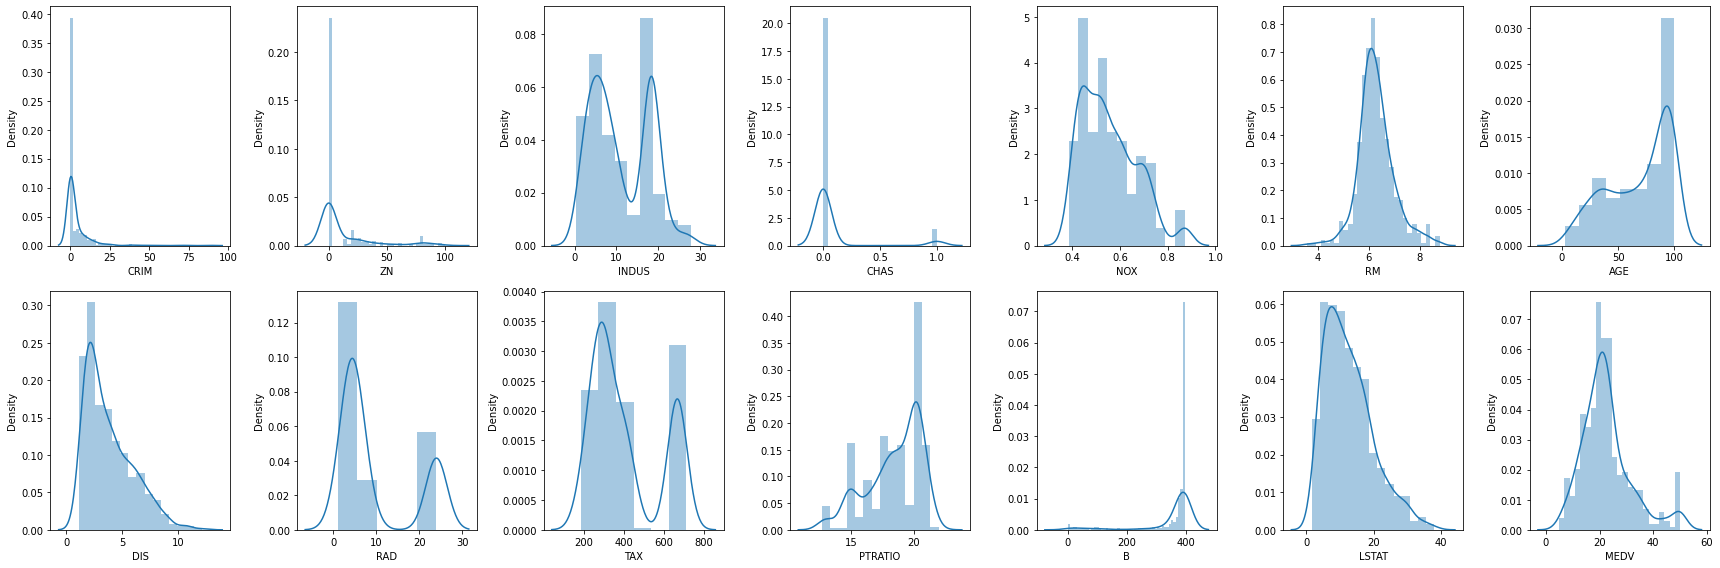

In [ ]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize = (24,8))

col = train_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(train_data[col[index]],ax = ax[i][j])
        index = index + 1
plt.tight_layout()

<AxesSubplot:>

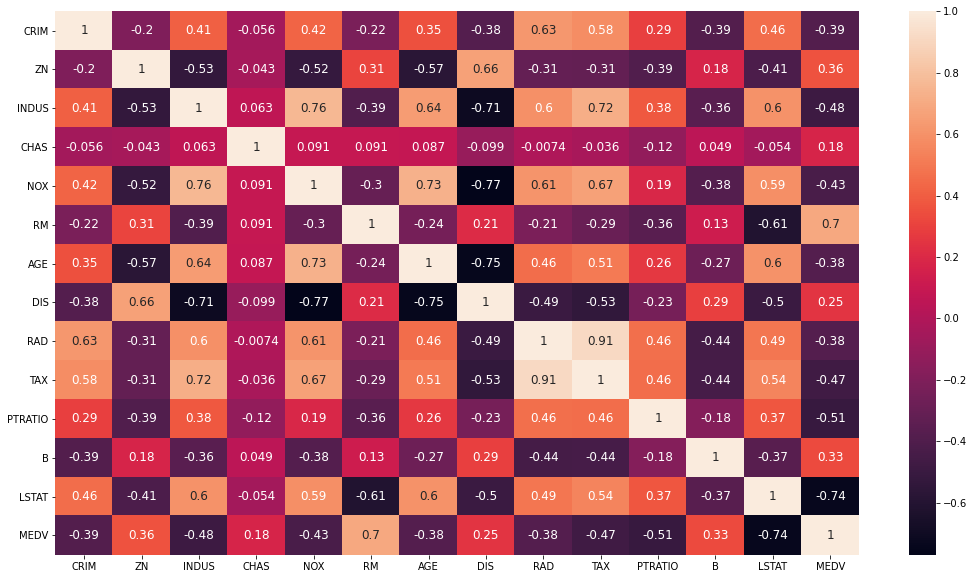

In [ ]:
#现在绘制所有特征间的相关系数热力图
corrmat = train_data.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

其中，LSTAT与price的相关程度最高(r=-0.74)，其次是RM,PTRAIO(|r|>=0.5), TAX,NOX(|r|>=0.4)。
因此，房价可能与LSTAT(底层人口的百分比),RM(每个住宅的平均房间数),PTRATIO(各镇的师生比率),
TAX(每$ 10,000的全值财产税率),NOX(一氧化氮的浓度)有一定但不算太强的相关性。

## 模型搭建思路：
考虑到不少特征与房价并无强相关性，若带入所有数据可能会对模型训练引入噪音，故而对所有模型，学生将对全数据集与经特征提取过的数据集分别套用相同模型，用rse、rae、r2_score作为evaluation metrics（以r2_score为主）。

In [ ]:
#from sklearn.model_section import train_test_split   会报错 ImportError: No module named model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sklearn
print(sklearn.__version__)

0.19.1


In [ ]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i,index in enumerate(corrdata.index) :
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
     
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [ ]:
from sklearn.metrics import r2_score
col=['threshold','r2_score','mse','mse']
r2=[]
mae=[]
mse=[]
thre=[]
threshold=0.1
while threshold <= 1:
    corr_value = getCorrelatedFeature(corrmat['MEDV'],threshold)
    correlated_data = train_data[corr_value.index]
    X = correlated_data.drop(labels=['MEDV'],axis = 1) 
    y = correlated_data['MEDV']
    # 分割训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
    
    ##加载线性回归模型
    model=LinearRegression()
    ##将训练数据传入开始训练
    model.fit(X_train,y_train)

    print(model.coef_)     #系数，偏执，有些模型没有系数（如k近邻）
    print(model.intercept_) #与y轴交点，即截距
    
    y_predict = model.predict(X_test)
    
    df = pd.DataFrame(data = [y_predict, y_test])
    
    #r2_score：判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。
    r2.append(r2_score(y_test, y_predict))  
    mae.append(mean_absolute_error(y_test, y_predict))  #平均绝对误差，用于评估预测结果和真实数据集的接近程度的程度，其其值越小说明拟合效果越好。
    mse.append(mean_squared_error(y_test, y_predict))  #均方差,该指标计算的是拟合数据和原始数据对应样本点的误差的平方和的均值，其值越小说明拟合效果越好。
    thre.append(threshold)
    threshold+=0.1
    print(threshold,"\n")

[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
38.091694926302154
0.2 

[-1.25156811e-01  4.48575121e-02  2.01265385e-02 -1.62895522e+01
  3.77366409e+00 -2.13185120e-03 -1.40611846e+00  2.66835482e-01
 -1.21692284e-02 -1.07660161e+00  8.72533635e-03 -4.94425348e-01]
38.42706211257632
0.30000000000000004 

[-9.82292616e-02  7.59436005e-03  1.13203463e-01 -8.57851466e+00
  4.28058564e+00  2.47678293e-02  2.60823469e-01 -1.22197011e-02
 -1.19105581e+00  9.45553301e-03 -4.97973454e-01]
25.073916678562444
0.4 

[ 6.98982840e-02 -3.55728522e+00  4.48966524e+00 -4.38418881e-03
 -1.07323064e+00 -5.20827038e-01]
23.7171150339421
0.5 

[ 4.26494747 -1.13654724 -0.57552137]
24.03109342937118
0.6 

[ 5.10906846 -0.65494879]
-1.2625286844374628
0.7 

[-0.95648761]
34.76519272372788
0.7999999999999999 



ValueError: Found array with 0 feature(s) (shape=(404, 0)) while a minimum of 1 is required.

In [ ]:
def performance_metric(y_true,y_predict):
    #calcuates and return performance_score between true and predit based on metric chosen  
    score = r2_score(y_true,y_predict)
    return score

In [ ]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


回答： R ^ 2 = 92.3％ 这意味着92.3％的变化由目标变量解释，并且似乎很高。 潜在的陷阱：这里我们只有五个要点，可能很难得出具有统计意义的结论。

我们可以得到输出四个特征的关系:
## y=−0.01759158x1+4.3701041x2−0.94665828x3−0.60046412x4+20.27487956y=−0.01759158x1+4.3701041x2−0.94665828x3−0.60046412x4+20.27487956
官网上还有提到Ridge Regression，我们也来试一试，它其实就是在最小二乘法的基础上对系数的L2范数的平方加了一个λλ惩罚项。
对于普通的线性回归，我们的算法思路是：minw||wX−y||22minw||wX−y||22此处为L2范数的平方此处为L2范数的平方
## 对于Ridge Regression，它的思路是：minw||wX−y||22+λ||w||22

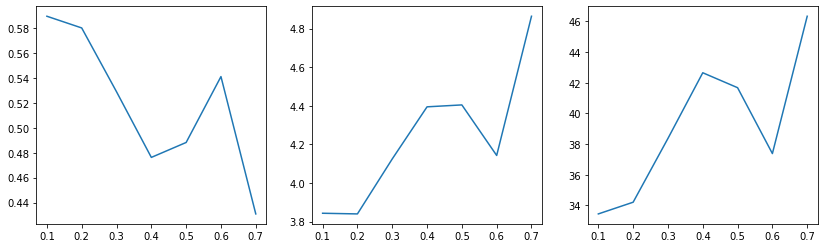

In [ ]:
rows = 1
cols = 3
fig, (ax1,ax2,ax3) = plt.subplots(nrows=rows,ncols=cols,figsize=(14,4))
ax1.plot(thre,r2)
ax2.plot(thre,mae)
ax3.plot(thre,mse)

## 如何进行特征提取？
设定一个阈值threshold，与price相关系数绝对值大于该阈值的特征被保留。
（阈值太高则保留的特征很少，模型容易欠拟合；太低则容易过拟合）对阈值从0.1到1进行搜索，选取使“正则化且完成了数据标准化的线性回归模型”的rse、rae、r2得分较低的阈值。
## 由上图知：threshold取0.5时线性回归模型的rse、rae、r2综合得分较低。

In [ ]:
data_X=train_data[['ZN','RM','PTRATIO','LSTAT']]
data_y=train_data[['MEDV']]
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size = 0.1, random_state = 0)
#查看训练数据集与测试数据集的大小，检测数据集分割是否有问题
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 4)
(51, 4)
(455, 1)
(51, 1)


r2: 0.3899959810472351


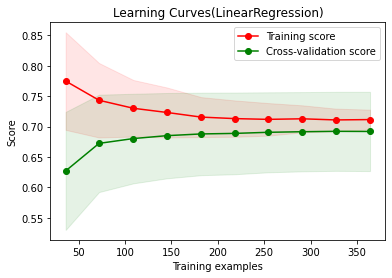

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print("r2:",r2_score(y_test, y_predict))

from sklearn.model_selection import learning_curve, ShuffleSplit

def plot_learning_curve (estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel ("Training examples")
    plt.ylabel("Score")
    
    train_sizes,train_scores, test_scores = learning_curve(
        estimator, X,y,cv=cv, n_jobs=n_jobs,train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean (test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label= "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label= "Cross-validation score")
    
    plt.legend(loc= "best")
    return plt
              
title = "Learning Curves(LinearRegression)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
              
estimator = LinearRegression(normalize=True)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7,1.01), cv=cv, n_jobs=-1)


plt.grid()
plt.show()

ValueError: Found array with 0 feature(s) (shape=(404, 0)) while a minimum of 1 is required.

数据集分类出错

# 模型搭建与训练
# 逐步调参前的多模型效果比较

In [ ]:
#print(X_test.shape)
#print(X_test)
#print(X_test.iloc[:,0:-3].values)
#print(X_test.iloc[:,1:-2].values)
#print(X_test.iloc[:,2:-1].values)
#print(X_test.iloc[:,3:4].values)

In [ ]:
#ValueError: x and y must be the same size

r2_score: 0.39


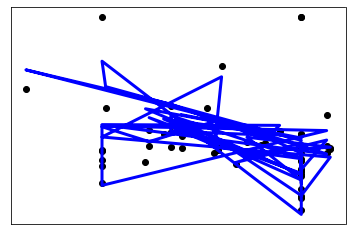

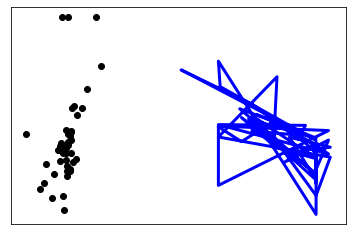

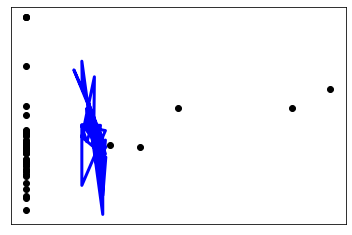

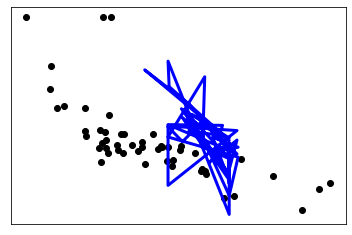

In [ ]:
print('r2_score: %.2f' % r2_score(y_test, y_predict))
# 绘制预测效果图

#print(X_test.iloc[:,0:-3].values)
#print(X_test.iloc[:,1:-2].values)
#print(X_test.iloc[:,2:-1].values)
#print(X_test.iloc[:,3:4].values)

plt.scatter(X_test.iloc[:,2:-1].values, y_test, color='black')
plt.plot(X_test.iloc[:,2:-1].values, y_predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

plt.scatter(X_test.iloc[:,1:-2].values, y_test, color='black')
plt.plot(X_test.iloc[:,2:-1].values, y_predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

plt.scatter(X_test.iloc[:,0:-3].values, y_test, color='black')
plt.plot(X_test.iloc[:,2:-1].values, y_predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

plt.scatter(X_test.iloc[:,3:4].values, y_test, color='black')
plt.plot(X_test.iloc[:,2:-1].values, y_predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
##导入线性回归模型
from sklearn.linear_model import Ridge  #导入岭回归
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib  #模型的保存和加载 

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#重新分割数据集
data_X=train_data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
data_y=train_data[['MEDV']]
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size = 0.1, random_state = None)
#查看训练数据集与测试数据集的大小，检测数据集分割是否有问题
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455, 1)
(51, 1)


In [ ]:
#生成模型和训练模型
LR=LinearRegression().fit(X_train,y_train) 
print(model.coef_)     #输出每个特征的权值，系数，有些模型没有系数（如k近邻）
print(model.intercept_) #与y轴交点，即截距
y_pred = LR.predict(X_test)                        #模型预测
print("\n")

#Ridge(alpha=0.01).fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#Lasso().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#ElasticNet().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#KNeighborsRegressor().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#DecisionTreeRegressor().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#SVR().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#AdaBoostRegressor().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#GradientBoostingRegressor().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#RandomForestRegressor().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

#ExtraTreesRegressor().fit(X_train,y_train)
#print(model.coef_)     #系数，有些模型没有系数（如k近邻）
#print(model.intercept_) #与y轴交点，即截距
#print("\n")

[[-0.00857818  4.74311082 -1.09633069 -0.54084703]]
[19.93395701]




## 绘制预测结果
由于可视化能给我们带来最直观的认知，所以下面将通过可视化的方法，来展示回归模型预测的效果。通过以下代码，可以得到针对波士顿房价数据集，预测房价和实际房价之间的对比图。

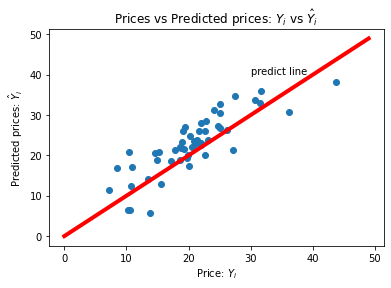

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_predict)
plt.xlabel("Price: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()

x = np.arange(0, 50)
y = x

plt.grid()
plt.plot(x, y, color = 'red', lw = 4)
plt.text(30,40, "predict line")
plt.savefig ("price.eps")

![predictions_Vs_ytest](https://dsw2-dsw-d20210516070434d645b49b90e0000572303-8888.pcs-gw-cn-shanghai.aliyun.com/files/download/Boston_house_price/price.png?_xsrf=2%7Ca3ef7a17%7C9703c8a8b0e58ce213ab2c7d037f0a36%7C1621119895)

在代码功能实现层面，我们知道，如果预测房价和实际房价一致的话，那么所有的数据点都应该汇集在 y=x 这条线上，但这并不是现实，于是可以看到，除了少数点，大部分点散落在 y=x 附近，大趋势说明预测的结果还不错

除了可以利用常规的 Matplotlib 绘制图形，还可以利用前面学习的 Seaborn 绘制更加“炫丽”的线性回归模型趋势图，这时就要用到 lmplot( ) 方法了。该方法用以绘制回归趋势图，描述线性关系，拟合数据集回归模型。hue、col、row 参数可用来控制绘图变量

In [ ]:
print("w0 = ", LR.intercept_)    #输出截距
print ("W = ",  LR. coef_)     #输出每个特征的权值

w0 =  [38.66769689]
W =  [[-8.87521773e-02  5.34429993e-02  3.85002367e-02  2.96519242e+00
  -1.91209350e+01  3.66600291e+00  5.41787134e-03 -1.52906211e+00
   3.12095417e-01 -1.29743565e-02 -9.62717187e-01  8.75917296e-03
  -5.55675671e-01]]


In [ ]:
#import seaborn as sns
#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips") #载入自带数据
#print(tips)
#研究小费tips与总消费金额total_bill在吸烟与不吸烟人之间的关系
#g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,palette="Set1")

In [ ]:
print(y_test.shape)
print(y_pred.shape)
#g = sns.lmplot(x="MEDV", y="tip", hue="smoker", data=y_test,palette="Set1")

(51, 1)
(51, 1)


In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

15.212919370344569


In [ ]:
df = pd.DataFrame()
#df[{'实际房价': y_test, '预测房价': y_pred},index=[0]]

lists = np.array(y_test)
lists = list(lists)
labels = y_pred

df = pd.DataFrame()
df["list"] = lists
df["label"] = labels
 
#print(df)

In [ ]:
#sns.set_style("whitegrid")
#真实房价与预测值的关系
#g = sns.lmplot(x="list", y="label", data=df, palette="Set1")

In [ ]:
#Choosing the best model:GradientBoostingRegressor
import random
best_model = sklearn.ensemble.GradientBoostingRegressor(random_state=random.seed())
best_model.fit(X_train, y_train)

# make predictions using the modeI
predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))

[INFO] MSE : 5.637


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# plot between predictions and Y test
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker= "o", alpha=0.7, color='r',label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g',label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.savefig("predictions_Vs_ytest.png")
plt.clf()
plt.close()

![predictions_Vs_ytest](https://dsw2-dsw-d20210516070434d645b49b90e0000572303-8888.pcs-gw-cn-shanghai.aliyun.com/files/download/Boston_house_price/predictions_Vs_ytest.png?_xsrf=2%7Ca3ef7a17%7C9703c8a8b0e58ce213ab2c7d037f0a36%7C1621119895)

IndexError: index 1 is out of bounds for axis 0 with size 1

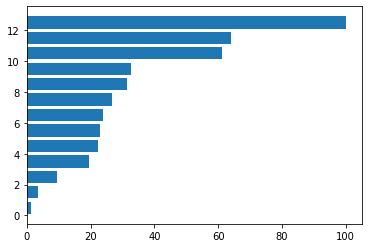

In [ ]:
# plot model's feature importance
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
corr_value = getCorrelatedFeature(corrmat['MEDV'],threshold)
correlated_data = train_data[corr_value.index]
                               
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,correlated_data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig("feature_importance.png")
plt.clf()
plt.close()

# step:

1.gridsearchcv遍历每个模型的主要参数，求出每个模型的最佳参数。

2.分别求出feature=3(只考虑'RM', 'PTRATIO', 'LSTAT' 3个features)与feature=13(考虑所有features)时各模型在最佳参数下的r2_Score效果，得出feature=3与13时各自的最佳模型。

3.比较feature=3与13时各自最佳模型的r2_Score平均值与方差，得出全局最优模型。

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        if not set (models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params) 
        self.models = models
        self.params = params 
        self.keys = models.keys() 
        self.grid_searches = {}


    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key] 
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, 
                              refit=refit, return_train_score=True)

            gs.fit(X, y)
            self.grid_searches[key] = gs
      

    def score_summary(self, sort_by='mean_score'):
        def row (key, scores, params):
          d ={
              'estimator' : key,
              'min_score' : min (scores),
              'max_score' : max(scores),
              'mean_score' : np.mean(scores),
              'std_score' : np.std(scores),
          }     
          return pd.Series({**params, **d})
        
          rows =[]
          for k in self.grid_searches: 
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores =[]
            for i in range(self.grid_searches[k].cv):
              key = "split{}_test_score".format(i) 
              r = self.grid_searches[k].cv_results_[key]
              scores.append(r.reshape(len(params), 1))
            
          all_scores = np.hstack(scores)
          for p,s in zip(params, all_scores):
             rows.append((row(k, s, p)))
                                                         
          df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
                                                         
          columns = ['estimator', 'min_scor','mean_score', 'max_score', 'std_score'] 
          columns = columns + [c for c in df.columns if c not in columns]
            
          return df[columns]

# 评价模型表现
在这个练习中，你将需要将所学到的内容整合，使用决策树算法训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 'max_depth' 参数。你可以把'max_depth' 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是监督学习算法中的一种。

## GridSearchCV 网格搜索和交叉验证
GridSearchCV的名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。这两个名字都非常好理解。网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。
GridSearchCV可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，他要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
models1 = {
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "ElasticNet":ElasticNet(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

params1 = {
    'SVR': {'kernel':('linear', 'rbf'), 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]},
    'KNeighborsRegressor': {'weights': ['uniform', 'distance'],
                             'n_neighbors': range(2,100)
                             },
    'DecisionTreeRegressor':  {'max_features': ['sqrt', 'log2', None],
                             'max_depth': range(2,1000),
                             },
    'RandomForestRegressor': {
    'min_samples_split': list((3,6,9)),'n_estimators':list((10,50,100))},
    "GradientBoostingRegressor":{'n_estimators':[100], 'learning_rate': [0.1], 'max_depth':[6],'min_samples_leaf':[3], 'max_features':[3]},
    "AdaBoostRegressor":{'n_estimators': [50, 100], 'learning_rate' : [0.01,0.05,0.1,0.3,1],'loss' : ['linear', 'square', 'exponential']},
    "ElasticNet": {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)},
    "ExtraTreesRegressor":{
        'max_features': range(1,4,1),
    }
    
}

helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='r2', n_jobs=2)
helper1.score_summary(sort_by='max_score')
print("\r\n")

Running GridSearchCV for SVR.


TypeError: __init__() got an unexpected keyword argument 'return_train_score'

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
Xall = train_data.drop(labels=['MEDV'],axis = 1)
yall = train_data[['MEDV']]
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(Xall, yall, test_size = 0.1, random_state = 0)
models1 = {
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "ElasticNet":ElasticNet(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

params1 = {
    'SVR': {'kernel':('linear', 'rbf'), 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]},
    'KNeighborsRegressor': {'weights': ['uniform', 'distance'],
                             'n_neighbors': range(2,100)
                             },
    'DecisionTreeRegressor':  {'max_features': ['sqrt', 'log2', None],
                             'max_depth': range(2,1000),
                             },
    'RandomForestRegressor': {
    'min_samples_split': list((3,6,9)),'n_estimators':list((10,50,100))},
    "GradientBoostingRegressor":{'n_estimators':[100], 'learning_rate': [0.1], 'max_depth':[6],'min_samples_leaf':[3], 'max_features':[3]},
    "AdaBoostRegressor":{'n_estimators': [50, 100], 'learning_rate' : [0.01,0.05,0.1,0.3,1],'loss' : ['linear', 'square', 'exponential']},
    "ElasticNet": {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)},
    "ExtraTreesRegressor":{
        'max_features': range(1,4,1),
    }
    
}

helper2 = EstimatorSelectionHelper(models1, params1)
helper2.fit(X_train_1, y_train_1, scoring='r2', n_jobs=2)
helper2.score_summary(sort_by='max_score')
print("\r\n")

Running GridSearchCV for SVR.
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Running GridSearchCV for KNeighborsRegressor.
Fitting 3 folds for each of 196 candidates, totalling 588 fits


[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:  1.3min finished


Running GridSearchCV for DecisionTreeRegressor.
Fitting 3 folds for each of 2994 candidates, totalling 8982 fits


[Parallel(n_jobs=2)]: Done 588 out of 588 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Done 4212 tasks      | elapsed:    9.2s


Running GridSearchCV for RandomForestRegressor.
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Done 8982 out of 8982 | elapsed:   19.5s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_valida

Running GridSearchCV for GradientBoostingRegressor.
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    2.5s finished
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running GridSearchCV for AdaBoostRegressor.
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Running GridSearchCV for ElasticNet.
Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    8.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning

Running GridSearchCV for ExtraTreesRegressor.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=2)]: Done 630 out of 630 | elapsed:    1.9s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validati

[Parallel(n_jobs=2)]: Done   9 out of   9 | elapsed:    0.2s finished


# 训练模型
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据提问，并返回对目标变量的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

In [ ]:
from visuals import *
import visuals as vs
#import sys
#sys.path.append('download/Boston_house_price/visuals.py')
#python import模块时， 是在sys.path里按顺序查找的。sys.path是一个列表，里面以字符串的形式存储了许多路径。使用A.py文件中的函数需要先将他的文件路径放到sys.path中
#from imp import reload
#reload(PredictTrials)

In [ ]:
def performance_metric(y_true,y_predict):
    #calcuates and return performance_score between true and predit based on metric chosen  
    score = r2_score(y_true,y_predict)
    return score

def fit_model(X, y):
    #Performs grid search over the ' max_depth, parameter for a decision tree regressor trained on the input data [X, y].
    
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import StratifiedShuffleSplit
    from sklearn.metrics import make_scorer
    from sklearn.model_selection import GridSearchCV
    #Create cross-validation sets from the training data
    
    cv_sets=ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    print(cv_sets,"\n")
    #Create a decision tree regressor object
    regressor = GradientBoostingRegressor()
    
    #Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'n_estimators':[100], 'learning_rate':[0.1], 'max.depth':[6], 'min_samples_leaf':[3], 'max_features':[3]}
    print(params,"\n")

    #Transform 'performancejnetric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)
    print(scoring_fnc,"\n")   
    
    #Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    print(grid,"\n")
    
    #Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
              
    #Return the optimal model after fitting the data
    return grid.best_estimator_

## 最优模型
将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [ ]:
# 3.特征工程-标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(X_train)
x_test = transfer.fit_transform(X_test)

# 4.机器学习-线性回归(岭回归)【重要】
# 4.1 创建模型 实例化估计器
estimator = Ridge(alpha=1)#(alpha表示正则的程度）
# 4.2 训练模型 fit 正规方程计算得到最优可训练参数
estimator.fit(X_train, y_train)

#保存模型
joblib.dump(estimator,'./model.pkl')#注意用文本打开是错误的，只能加载！！

# 5.模型评估
# 5.1 获取系数等值
y_predict = estimator.predict(X_test)
print("预测值为:\n", y_predict)
print("模型中的系数为:\n", estimator.coef_)
print("模型中的偏置为:\n", estimator.intercept_)
# 5.2 评价
# 均方误差
error = mean_squared_error(y_test, y_predict)
print("误差为:\n", error)

预测值为:
 [[19.61473616]
 [13.13347891]
 [22.00688393]
 [25.32912564]
 [31.99695423]
 [26.65986789]
 [12.58776389]
 [21.96613607]
 [17.71282217]
 [30.05074982]
 [21.47091292]
 [29.37286026]
 [16.39269657]
 [18.09191484]
 [15.031073  ]
 [20.22342515]
 [23.96176206]
 [23.68707405]
 [33.65852498]
 [28.07339231]
 [23.78907374]
 [21.10128491]
 [18.8852755 ]
 [29.07836187]
 [20.31981909]
 [19.12597301]
 [18.31882857]
 [17.29578572]
 [25.51715501]
 [20.15238211]
 [31.33793783]
 [20.45463496]
 [20.04565048]
 [25.45332133]
 [16.3287345 ]
 [ 9.40232106]
 [21.10757738]
 [21.95925116]
 [26.29844748]
 [24.17819786]
 [11.87085457]
 [ 5.53769328]
 [ 6.3843967 ]
 [15.56051499]
 [19.65528443]
 [ 6.353208  ]
 [20.88722336]
 [22.4917093 ]
 [24.08724382]
 [34.91500063]
 [31.5328464 ]]
模型中的系数为:
 [[-8.29969989e-02  5.44758787e-02  4.13776885e-03  2.81122097e+00
  -1.11411568e+01  3.73275373e+00 -1.36986848e-03 -1.40763675e+00
   2.94450846e-01 -1.36021215e-02 -8.73830595e-01  9.30378092e-03
  -5.64938471e-01]]

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


## 预测销售价格
使用你优化的模型来为每位客户的房屋价值做出预测。

In [ ]:
# Load the Boston housing dataset
# 载入波士顿房屋的数据集
data = pd.read_csv('bostonh.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

KeyError: 'MEDV'

In [ ]:
# TODO: Import 'train_test_split'
train_data=pd.read_csv('bostonh.csv',sep='\s+',encoding='utf-8')
from sklearn.cross_validation import train_test_split
prices = train_data['MEDV']#TODO：提取SalePrice作为labels
features = train_data.drop(['MEDV'], axis=1)#TODO：提取除了SalePrice以外的特征赋值为features

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    train_size=0.8, random_state=123)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

ShuffleSplit(n_splits=404, random_state=0, test_size=0.2, train_size=None) 

{'n_estimators': [100], 'learning_rate': [0.1], 'max.depth': [6], 'min_samples_leaf': [3], 'max_features': [3]} 

make_scorer(performance_metric) 

GridSearchCV(cv=ShuffleSplit(n_splits=404, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'learning_rate': [0.1], 'max.depth': [6], 'min_samples_leaf': [3], 'max_features': [3]},
       

ValueError: Invalid parameter max.depth for estimator GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print(regressor)
print(params)
print(scoring_fnc)
print(cv_sets)

NameError: name 'regressor' is not defined

In [ ]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

NameError: name 'reg' is not defined

 我会建议客户按照上面的建议去销售，从房间数量，贫困指数，师生比例来看，建议的价格是合理的。

# 模型的鲁棒性
一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。执行下方区域中的代码，采用不同的训练和测试集执行 fit_model 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [ ]:
def fit_model(X, y):
    # Performs grid search over the 'max_depth' parameter for a 
    #  decision tree regressor trained on the input data [X, y].

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# 请先注释掉 fit_model 函数里的所有 print 语句
vs.PredictTrials(Xall, yall, fit_model, Xall[:1].values)

ValueError: Invalid parameter max.depth for estimator GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

## 决策树基准测试
R2 大概在0.7左右

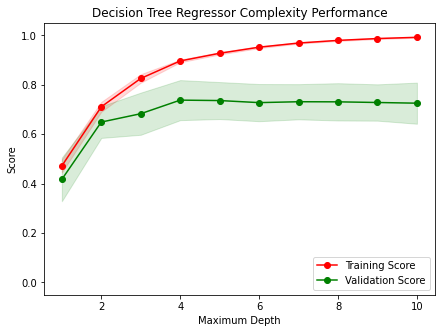

In [ ]:
vs.ModelComplexity(X_train, y_train)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

cv_sets = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.20, random_state=0)
scoring_fnc = make_scorer(performance_metric)

params = {'n_estimators': range(20, 40, 3)}
grid = GridSearchCV(ExtraTreesRegressor(random_state=0), params, scoring_fnc, cv=cv_sets)
grid.fit(X_train, y_train)
print(grid.best_score_)
reg = grid.best_estimator_
reg.get_params()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10)
scores = cross_val_score(reg, X, y, cv=kfold)
print('mean: %.4f, std: %.4f' % (scores.mean(), scores.std()))

# 实用性探讨
简单地讨论一下你建构的模型能否在现实世界中使用？

尽管此模型最终预测效果良好，但在尝试使用给定参数预测给定新数据点的房价时，在实际环境中使用此模型之前，我们需要解决一些缺陷：
首先，以上预测使用的是1978年房价数据。由于通胀、动乱等政治经济社会因素的影响，若将该模型的特征用于如今的房价预测可能效果不会很显著，
也许有一些与如今房价更紧密的特征（如：与学校的距离等）未被纳入此模型。
其次，一个社区内的房价也可能有很大差别（美国有不少贫民窟紧挨富人区），而我们的预测模型有将同一社区房价同质化的缺点。
再者，在城市中收集的数据不适用于农村城市，因为城市和农村都具有不同的特征，每个特征的值也不同。（总之，统计数据的采集过程可能有诸多细节有待优化。）

可以从这几个角度分析：

1978年所采集的数据，在今天是否仍然适用？
数据中呈现的特征是否足够描述一个房屋？
模型是否足够健壮来保证预测的一致性？
在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？

答案:
1987年的数据在今天肯定是不适用了，但是在学习机器学习的目的来看，还是十分有意义的。
数据中呈现的特征已经尽可能去描述房屋的各项指标了，但是肯定是不够的，最终客户还是有必要去看房。
模型的健壮性还是不够的，经过十次训练，价格的极差竟然高达 $69,044.61，是房屋平均价格的17%。因此模型还有待改善。

## 相对平方误差（Relative Squared Error，RSE）
## 相对绝对误差（Relative Absolute Error，RAE)
## 决定系数 (Coefficient of Determination)

事实上，当threshold取0.5时线性回归模型的rse、rae、r2综合得分较低。
r2_score——拟合优度，一种回归评价指标，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。

In [ ]:
#可视化训练过程中的损失值
# 迭代轮次
train_epochs = 50 

# 学习率
learning_rate = 0.01 

loss_list = [] # 用于保存loss值的列表

#data_X=train_data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
#data_y=train_data[['MEDV']]
#X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size = 0.1, random_state = None)

for epoch in range (train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(data_X, data_y):   

        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)

        loss = sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys}) 

        loss_sum = loss_sum + loss
        
        #loss_list.append(loss) # 每步添加一次
    
    # 打乱数据顺序
    data_X, data_y = shuffle(data_X, data_y)
    
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    loss_list.append(loss) # 每轮添加一次
    
    print("epoch=", epoch+1,"loss=", loss_average,"b=", b0temp,"w=", w0temp )

# 可以用于训练外部模型

In [ ]:
!python3 Boston_house_price.py

In [ ]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
       
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    from sklearn.model_selection import ShuffleSplit
    from sklearn.metrics import make_scorer
    # Create cross-validation sets from the training data
          
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    print (cv_sets)
    
    # TODO: Create a decision tree regressor object
    regressor=GradientBoostingRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {' n_estimators, : [100], * learning_rate’： [0.1], ' max.depth' : [6],' min_samples_leaf, : [3],}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
!python3 train.py

Traceback (most recent call last):
  File "train.py", line 121, in <module>
    traing_data, test_data = load_data()
  File "train.py", line 42, in load_data
    maximums = training_data.max(axis=0)
  File "/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py", line 39, in _amax
    return umr_maximum(a, axis, None, out, keepdims, initial, where)
ValueError: zero-size array to reduction operation maximum which has no identity


In [ ]:
#Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_